# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
from time import gmtime, strftime
import matplotlib.pyplot as plt
import openweathermapy as owm
import pandas as pd
import numpy as np
import requests
import json
import os

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = os.path.join('output','cities.csv')

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Print the city count to confirm sufficient count
len(cities)

602

In [3]:
# start off using a temporary list with fewer cities
# search more likely successful if including country code
smaller_list = [cities[i] + ',' + countries[i] for i, city in enumerate(cities[0:8])]
print(smaller_list)

['tabiauea,ki', 'terrace bay,ca', 'rikitea,pf', 'mataura,pf', 'bathsheba,bb', 'vaini,to', 'marienburg,sr', 'ushuaia,ar']


In [4]:
# here's the full list with country codes
full_list = [cities[i] + ',' + countries[i] for i, city in enumerate(cities)]

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [5]:
# prelim code for set increments, just brainstorming order
counter = 1
x = 1
for i in range(0,100):
    # print(f'record {counter} for set {x}')    
    counter = counter + 1
    if counter > 50:
        x = x + 1
        counter = 1

In [6]:
print('Beginning Data Retrieval')
print('-----------------------------')

base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'units=imperial'
weather_check = []
counter = 1
x = 1

for i, city in enumerate(full_list):
    url = base_url + units + '&appid=' + api_key + '&q=' + city
    try:
        response = requests.get(url).json()
        # temp = response['main']['temp']        # original from weather check
        
        # capture all weather data in variables
        city = response['name']
        cloudiness = response['clouds']['all']
        country = response['sys']['country']
        date = int(response['dt'])               # unix timestamp
        humidity = response['main']['humidity']
        lat = response['coord']['lat']
        lng = response['coord']['lon']
        max_temp = response['main']['temp_max']
        wind_speed = response['wind']['speed']
        
        # append weather data variables to dictionary
        weather_check.append({'city':city,
                              'cloudiness':cloudiness,
                              'country':country,
                              'date':date,
                              'humidity':humidity,
                              'lat':lat,
                              'lng':lng,
                              'max_temp':max_temp,
                              'wind_speed':wind_speed})
        
        # confirm record is found with process statement
        print(f"Processing record {i+1} of Set {x} | {city}")
            
    except:
        # confirm record is missing with skip statement
        print('City not found. Skipping...')
        
    # increment counter for incrementing sets
    counter = counter + 1
    if counter > 50:
        x = x + 1
        counter = 1

print('-----------------------------')
print('Data Retrieval Complete')

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing record 2 of Set 1 | Terrace Bay
Processing record 3 of Set 1 | Rikitea
City not found. Skipping...
Processing record 5 of Set 1 | Bathsheba
Processing record 6 of Set 1 | Vaini
Processing record 7 of Set 1 | Marienburg
Processing record 8 of Set 1 | Ushuaia
Processing record 9 of Set 1 | Ostrovnoy
Processing record 10 of Set 1 | Punta Arenas
Processing record 11 of Set 1 | Hilo
Processing record 12 of Set 1 | Sao Filipe
Processing record 13 of Set 1 | Kochubey
Processing record 14 of Set 1 | Cape Town
Processing record 15 of Set 1 | Volchikha
Processing record 16 of Set 1 | Norman Wells
Processing record 17 of Set 1 | Nikolskoye
Processing record 18 of Set 1 | Georgetown
Processing record 19 of Set 1 | Avarua
Processing record 20 of Set 1 | Dunda
Processing record 21 of Set 1 | Longyearbyen
City not found. Skipping...
Processing record 23 of Set 1 | Busselton
Processing record 24 of Set 1 | Te

Processing record 202 of Set 5 | Zyryanka
Processing record 203 of Set 5 | Shimoda
Processing record 204 of Set 5 | Lompoc
Processing record 205 of Set 5 | Torbay
Processing record 206 of Set 5 | Geraldton
Processing record 207 of Set 5 | Dukat
City not found. Skipping...
Processing record 209 of Set 5 | Kuchinarai
Processing record 210 of Set 5 | Ribeira Grande
Processing record 211 of Set 5 | Galveston
Processing record 212 of Set 5 | La Palma
Processing record 213 of Set 5 | Matara
City not found. Skipping...
Processing record 215 of Set 5 | San Cristobal
City not found. Skipping...
Processing record 217 of Set 5 | Varniai
Processing record 218 of Set 5 | Vila Velha
Processing record 219 of Set 5 | Andilamena
Processing record 220 of Set 5 | Gambela
Processing record 221 of Set 5 | Kargasok
Processing record 222 of Set 5 | Pringsewu
Processing record 223 of Set 5 | Jiazi
Processing record 224 of Set 5 | Nalut
Processing record 225 of Set 5 | Mongoumba
Processing record 226 of Set 5 

Processing record 403 of Set 9 | Vardo
Processing record 404 of Set 9 | Samarai
City not found. Skipping...
Processing record 406 of Set 9 | Nieuw Amsterdam
Processing record 407 of Set 9 | Hovd
City not found. Skipping...
Processing record 409 of Set 9 | Saurimo
Processing record 410 of Set 9 | Nassjo
Processing record 411 of Set 9 | Winnemucca
Processing record 412 of Set 9 | Petatlan
Processing record 413 of Set 9 | Ust-Nera
Processing record 414 of Set 9 | Lahij
City not found. Skipping...
Processing record 416 of Set 9 | Pemba
Processing record 417 of Set 9 | Chumphon
Processing record 418 of Set 9 | Caohe
Processing record 419 of Set 9 | Rawson
Processing record 420 of Set 9 | Broome
Processing record 421 of Set 9 | Challapata
Processing record 422 of Set 9 | Mikun
City not found. Skipping...
Processing record 424 of Set 9 | Portland
Processing record 425 of Set 9 | Neuquen
Processing record 426 of Set 9 | Tevaitoa
Processing record 427 of Set 9 | Mamallapuram
Processing record 4

In [7]:
# display weather data dictionary
# print(json.dumps(weather_check,indent=4,sort_keys=True))

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# load into dataframe
df = pd.DataFrame(weather_check)

# write csv without index, prepends comma otherwise
df.to_csv(output_data_file,index=False)

# display dataframe
df.head()

,city,cloudiness,country,date,humidity,lat,lng,max_temp,wind_speed
0,Terrace Bay,92,CA,1538121119,100,48.78,-87.10,43.66,17.13
1,Rikitea,92,PF,1538120878,100,-23.12,-134.97,72.01,6.96
2,Bathsheba,75,BB,1538118000,88,13.22,-59.52,77.00,33.33
3,Vaini,75,TO,1538118000,83,-21.20,-175.20,73.40,6.93
4,Marienburg,20,SR,1538118000,94,5.88,-55.04,77.00,2.24


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [26]:
# grab current date of analysis for plot titles
date = strftime('%m/%d/%y', gmtime())

#### Latitude vs. Temperature Plot

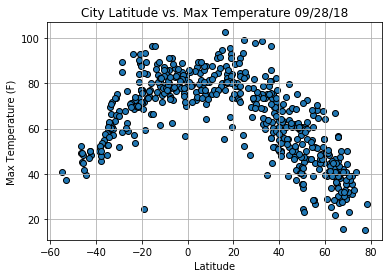

In [27]:
df.plot.scatter('lat','max_temp',s=36,edgecolors='black',figsize=(6,4))
plt.title(f'City Latitude vs. Max Temperature {date}')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid()

plt.savefig(os.path.join('output','lat_vs_temp.png'))

#### Latitude vs. Humidity Plot

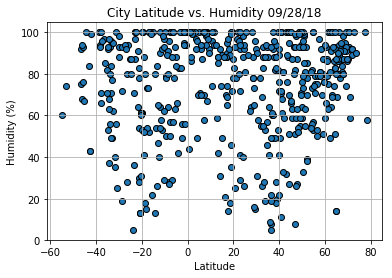

In [28]:
df.plot.scatter('lat','humidity',s=36,edgecolors='black',figsize=(6,4))
plt.title(f'City Latitude vs. Humidity {date}')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()

plt.savefig(os.path.join('output','lat_vs_humid.png'))

#### Latitude vs. Cloudiness Plot

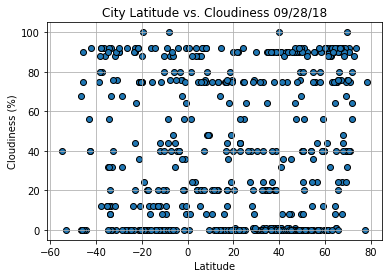

In [29]:
df.plot.scatter('lat','cloudiness',s=36,edgecolors='black',figsize=(6,4))
plt.title(f'City Latitude vs. Cloudiness {date}')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()

plt.savefig(os.path.join('output','lat_vs_cloud.png'))

#### Latitude vs. Wind Speed Plot

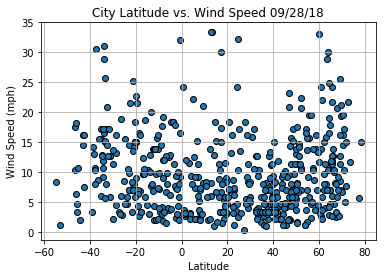

In [30]:
df.plot.scatter('lat','wind_speed',s=36,edgecolors='black',figsize=(6,4))
plt.title(f'City Latitude vs. Wind Speed {date}')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid()

plt.savefig(os.path.join('output','lat_vs_wind.png'))